<a href="https://colab.research.google.com/github/recon48/Colab-AI-PlayGround/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip list | grep opencv

opencv-contrib-python            4.8.0.76
opencv-python                    4.8.0.76
opencv-python-headless           4.10.0.84


In [3]:
image_src1 = 'https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F477%2F2023%2F09%2F19%2F0000451061_002_20230919055102135.jpg&type=a340'

image_source_file = image_src1

!wget -O sample_image.jpg {image_source_file}

--2024-06-27 01:58:30--  https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F477%2F2023%2F09%2F19%2F0000451061_002_20230919055102135.jpg
Resolving search.pstatic.net (search.pstatic.net)... 23.209.57.8
Connecting to search.pstatic.net (search.pstatic.net)|23.209.57.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253571 (248K) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>] 247.63K  --.-KB/s    in 0.005s  

2024-06-27 01:58:31 (48.1 MB/s) - ‘sample_image.jpg’ saved [253571/253571]



In [4]:
import cv2
import matplotlib.pyplot as plt

image_data_file = '/content/sample_image.jpg'
image = cv2.imread(image_data_file)

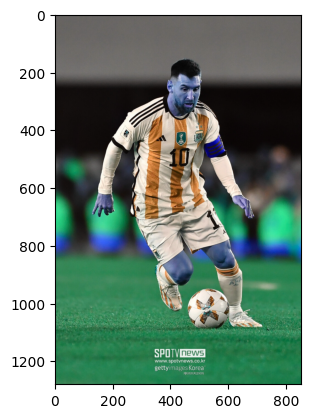

In [5]:
plt.imshow(image)
plt.show()

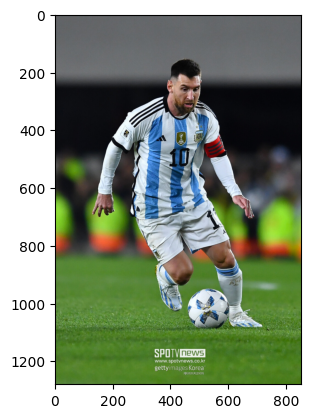

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

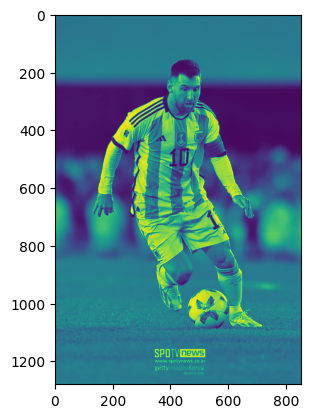

In [7]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray)
plt.show

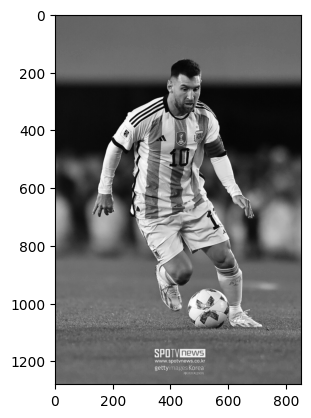

In [8]:
plt.imshow(image_gray, cmap = 'gray')

plt.show()

In [11]:
image_rgb.shape #(1280, 854, 3)

(1280, 854, 3)

In [12]:
image_gray.shape #(1280, 854)

(1280, 854)

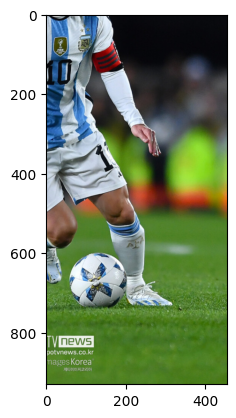

In [13]:
cropped_image_rgb = image_rgb[350:, 400:]

plt.imshow(cropped_image_rgb)
plt.show()

In [14]:
#remove noise
blur_gray_image = cv2.GaussianBlur(image_gray, (3,3),0)

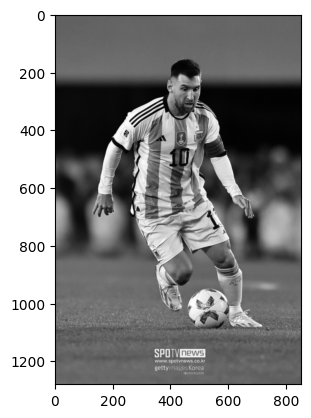

In [17]:
_= plt.imshow(blur_gray_image, cmap='gray')

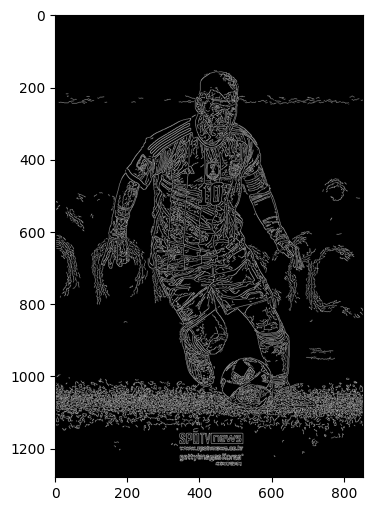

In [19]:
#Using the Canny filter to get contours
blur_gray_image = cv2.GaussianBlur(image_gray,(5,5),0)
edges = cv2.Canny(blur_gray_image, 20, 30)

_=plt.figure(figsize=(8,6))
_=plt.imshow(edges,cmap='gray')

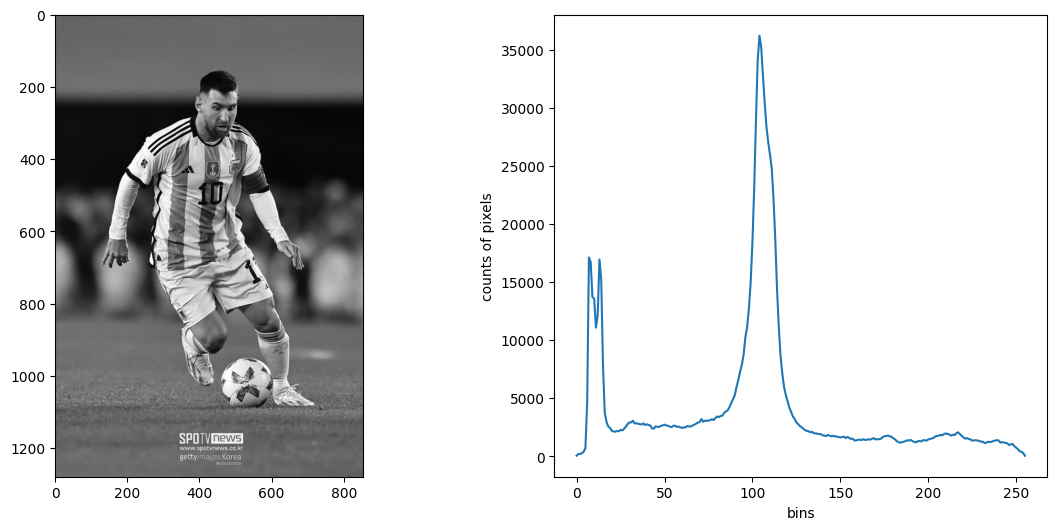

In [20]:
hist = cv2.calcHist([image_gray], [0], None, [256], [0,256])

_ = plt.figure(figsize = (14,6))
_ = plt.subplot(1, 2, 1)
_ = plt.imshow(image_gray, cmap='gray')

_ = plt.subplot(1, 2, 2)
_ = plt.xlabel("bins")
_ = plt.ylabel("counts of pixels")
_ = plt.plot(hist)

In [22]:
# 높이와 넓이를 60%로 스케일 다운

width = int(image_gray.shape[1] * 0.6)
height = int(image_gray.shape[0] * 0.6)

resized_gray_image = cv2.resize(image_gray, (width, height), interpolation = cv2.INTER_AREA)

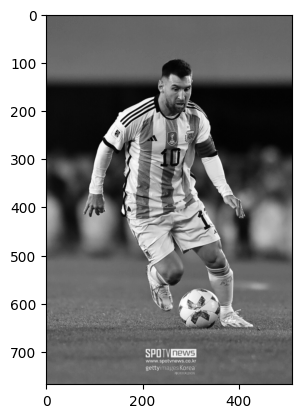

In [23]:
_ = plt.imshow(resized_gray_image, cmap='gray')

In [24]:
print("orginal gray image size(height, width) = ", image_gray.shape)
print("resized gray image size(height, width) = ", resized_gray_image.shape)

orginal gray image size(height, width) =  (1280, 854)
resized gray image size(height, width) =  (768, 512)


In [25]:
# x축을 기준으로 뒤집기
flipped_byx_gray_image = cv2.flip(image_gray, 0)

# y축을 기준으로 뒤집기
flipped_byy_gray_image = cv2.flip(image_gray, 1)

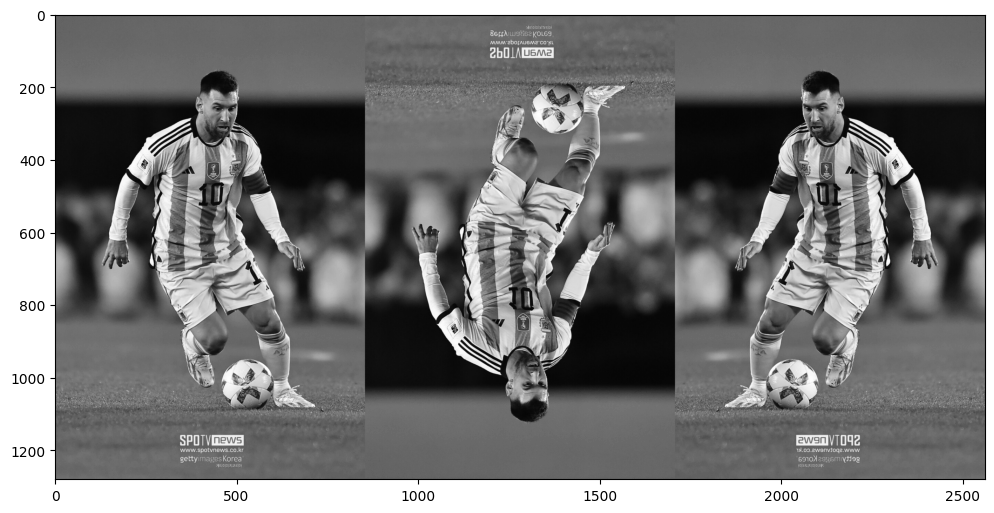

In [27]:
# 이미지 병합하기
import numpy as np
images = np.hstack((image_gray, flipped_byx_gray_image, flipped_byy_gray_image))

_ = plt.figure(figsize = (12, 8))
_ = plt.imshow(images, cmap = 'gray')

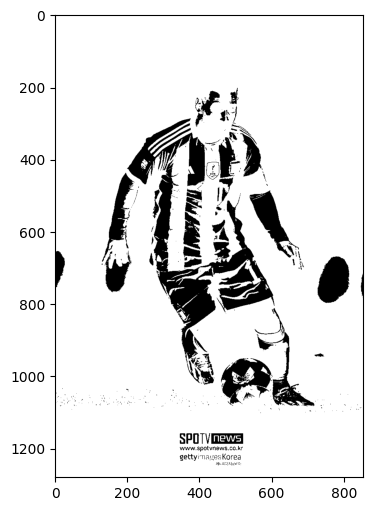

In [32]:
# 160이하는 흑백, 160 이상은 화이트로 이진화하기

threshold_value = 160
threshold_above_color = 255 #white
threshed_image = cv2.threshold(image_gray, threshold_value, threshold_above_color, cv2.THRESH_BINARY_INV)[1]
_ = plt.figure(figsize = (8, 6))
_ = plt.imshow(threshed_image, cmap='gray')

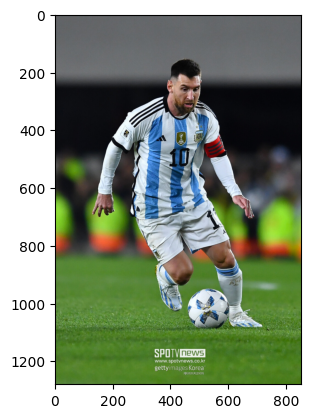

In [33]:
_ = plt.imshow(image_rgb)

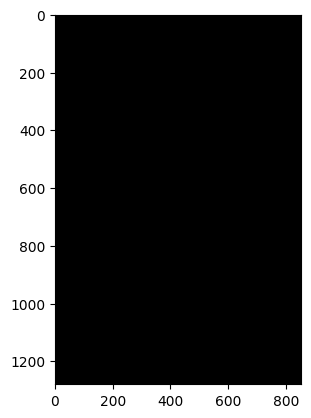

In [34]:
#이미지와 크기가 동일한 mask 만들기
mask_image = np.zeros_like(image_rgb)
plt.imshow(mask_image)

In [39]:
# 원을 그릴 공간의 중심 포인트를 찾기
width = round(mask_image.shape[1]/2)
height = round(mask_image.shape[0]/2)
center_coordinates = (width, height)

#Radius of circle
radius = 450

# white color in BGR
color = (255, 255, 255)

# Line thickness of -1 px
thickness = -1

mask_image2 = cv2. circle(mask_image, center_coordinates, radius, color, thickness)

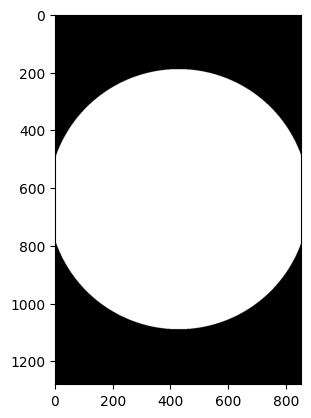

In [40]:
_ = plt.imshow(mask_image2)

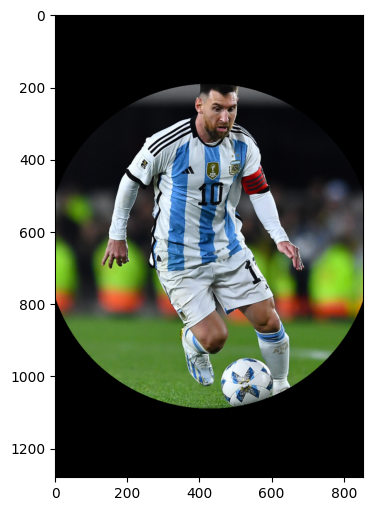

In [41]:
#bit연산을 수행 (bit_and)

final_composite_image = cv2.bitwise_and(image_rgb, mask_image2)
_ = plt.figure(figsize = (6,6))
_ = plt.imshow(final_composite_image)

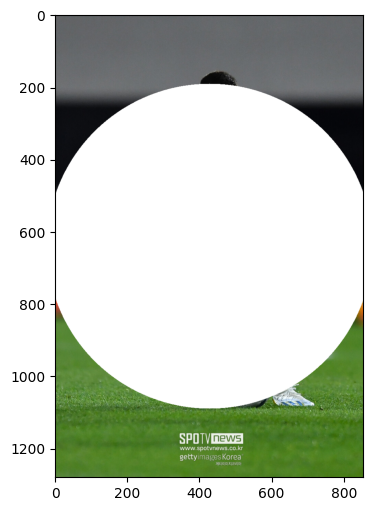

In [42]:
#bit연산을 수행(bit_or)
final_composite_image = cv2.bitwise_or(image_rgb, mask_image2)
_ = plt.figure(figsize = (6,6))
_ = plt.imshow(final_composite_image)

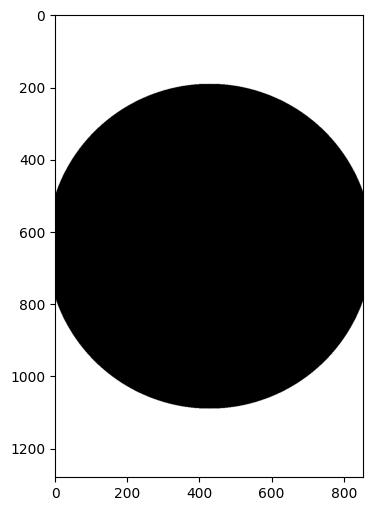

In [43]:
#bit연산을 수행 (bit_not)

final_composite_image4 = cv2.bitwise_not(mask_image2)
_ = plt.figure(figsize = (6,6))
_ = plt.imshow(final_composite_image4)